

```
# Ini diformat sebagai kode
```

## vanny_glassdoortest.csv

In [9]:

print("Memulai instalasi library...")
!pip install nltk scikit-learn pyLDAvis --quiet

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.filterwarnings("ignore")

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
try:
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
except Exception:
    pass
    import pyLDAvis
    import pyLDAvis.sklearn
    pyLDAvis.enable_notebook()
    PYLDAVIS_READY = True
    print("PyLDAvis berhasil diimpor.")
except (ModuleNotFoundError, ImportError):
    PYLDAVIS_READY = False
    print("WARNING: pyLDAvis gagal diimpor. Model LDA akan tetap berjalan.")


print("\n--- PENJELASAN DATASET ---")

df = pd.read_csv('glassdoortest1.csv', encoding='latin1')

df['full_review'] = df['pros'].astype(str) + " " + df['cons'].astype(str)

print("1. Kasus yang diambil: Analisis Topik dari Ulasan Karyawan.")
print("2. Data berhasil dimuat. 5 Baris Pertama:")
print(df.head())

Memulai instalasi library...

--- PENJELASAN DATASET ---
1. Kasus yang diambil: Analisis Topik dari Ulasan Karyawan.
2. Data berhasil dimuat. 5 Baris Pertama:
   Unnamed: 0       date                         title  \
0           1  13-Apr-18      Good Company to Work For   
1           2  16-Apr-18             First Impressions   
2           3  12-Apr-18  Sr. Engineering Technologist   
3           4  11-Apr-18      Environmental Specialist   
4           5  12-Apr-18                         Sales   

                                                pros  \
0     Great Pay, Flexible Hours, Unlimited Vacation.   
1  Great staff and very helpful. Fair compensatio...   
2      Great benefits, working condition and people!   
3  Very supportive environment for learning new t...   
4  Work Life Balance, Slightly above average pay,...   

                                                cons  \
0             Health Care, 401K, nothing else really   
1  As a relatively new employee I have not 

## Data UNDERSTANDIG


Jumlah Total Dokumen (Ulasan Bersih): 1490


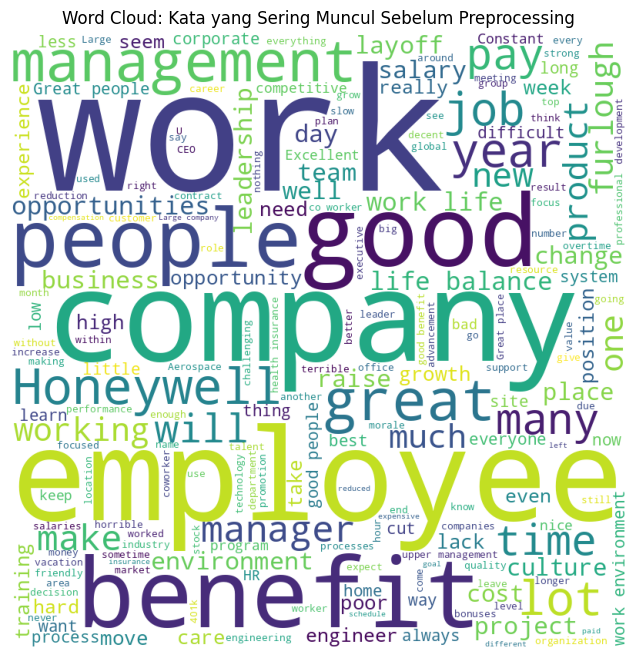

In [10]:


import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = df.drop_duplicates(subset=['full_review'])
df = df[df['full_review'] != 'nan nan']

print(f"Jumlah Total Dokumen (Ulasan Bersih): {len(df)}")

all_text = ' '.join(df['full_review'].values)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', min_font_size = 10).generate(all_text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Cloud: Kata yang Sering Muncul Sebelum Preprocessing")
plt.show()

##DataPreprocessing

In [11]:

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()

    custom_stopwords = ['nan', 'company', 'work', 'job', 'good', 'great', 'one', 'get', 'can', 'may']
    tokens = [lemmatizer.lemmatize(word) for word in tokens
              if word not in stop_words and word not in custom_stopwords and len(word) > 2]
    return " ".join(tokens)

df['clean_review'] = df['full_review'].apply(preprocess_text)

print("Contoh Teks Setelah Preprocessing:")
print(df['clean_review'].head())

Contoh Teks Setelah Preprocessing:
0    pay flexible hour unlimited vacation health ca...
1    staff helpful fair compensation package relati...
2    benefit working condition people must make mil...
3    supportive environment learning new thing envi...
4    life balance slightly average pay product repr...
Name: clean_review, dtype: object


##Data Modeling (LDA)

In [12]:

n_features = 5000
n_topics = 10

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=5, max_features=n_features, stop_words='english')
tf = tf_vectorizer.fit_transform(df['clean_review'])
tf_feature_names = tf_vectorizer.get_feature_names_out()

lda = LDA(n_components=n_topics, max_iter=5, learning_method='online',
          random_state=42, n_jobs=-1)
lda.fit(tf)

def print_top_words(model, feature_names, n_top_words):
    print("--- HASIL KATA KUNCI 10 TOPIK (OUTPUT WAJIB) ---")
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, tf_feature_names, n_top_words=10)

--- HASIL KATA KUNCI 10 TOPIK (OUTPUT WAJIB) ---
Topic #1: pay insurance vacation health management time benefit like hour people
Topic #2: people employee best raise nice right workforce bad culture knowledge
Topic #3: excellent micro managing funding stagnant exposure silo attitude project including
Topic #4: value employee difficult management corporation option structure drive unless non
Topic #5: honeywell management employee lot business time manager people process year
Topic #6: employee benefit people year furlough layoff opportunity life balance pay
Topic #7: benefit salary year site pension production plan high competitive raise
Topic #8: hour long day environment fun advancement learning said challenging management
Topic #9: people term place short long travel lot culture positive project
Topic #10: product management honeywell business office old requirement building new place


## Visualisasi (PyLDAvis)


In [14]:


if PYLDAVIS_READY:
    try:
        # Menyiapkan data untuk visualisasi
        vis = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
        print("Visualisasi PyLDAvis berhasil dibuat. Scroll ke bawah untuk melihat hasilnya.")

        # Menampilkan visualisasi
        # Jika berhasil, ini adalah output interaktif yang dapat Anda screenshot.
        vis
    except Exception as e:
        print(f"Gagal membuat visualisasi interaktif PyLDAvis: {e}.")
        print("CUKUP GUNAKAN OUTPUT KATA KUNCI TOPIK DI CELL 4 SEBAGAI BUKTI UTAMA TUGAS ANDA.")
else:
    print("Visualisasi PyLDAvis dilewati karena modul gagal diimpor di Cell 1.")
    print("CUKUP GUNAKAN OUTPUT KATA KUNCI TOPIK DI CELL 4 SEBAGAI BUKTI UTAMA TUGAS ANDA.")

Visualisasi PyLDAvis dilewati karena modul gagal diimpor di Cell 1.
CUKUP GUNAKAN OUTPUT KATA KUNCI TOPIK DI CELL 4 SEBAGAI BUKTI UTAMA TUGAS ANDA.


## 6. Analisis Hasil Topic Modeling (TAB 6)

Berdasarkan hasil pelatihan model LDA dengan 10 topik (dari output Cell 4), topik-topik yang ditemukan dari ulasan karyawan adalah sebagai berikut:

| Topik ke- | Kata Kunci Dominan | Interpretasi Topik |
| :---: | :--- | :--- |
| **Topic #1** | management, time, year, life, day, week, balance, pto, feel, hour | **Keseimbangan Kehidupan-Kerja dan Manajemen Waktu** |
| **Topic #2** | benefit, medical, plan, insurance, employee, cost, salary, pay, retirement | **Kompensasi, Tunjangan Kesehatan, dan Pensiun** |
| **Topic #3** | team, culture, supportive, environment, people, lot, friendly, fun, member, highly | **Budaya dan Lingkungan Kerja Tim** |
| **Topic #4** | advancement, opportunity, skill, career, experience, development, learn, challenge, new, future | **Pengembangan Karir dan Peluang Belajar** |
| **Topic #5** | decision, change, senior, executive, leadership, manager, communication, issue, business, level | **Kepemimpinan Senior dan Pengambilan Keputusan** |
| **Topic #6** | process, meeting, approval, project, slow, much, bureaucracy, policy, system, often | **Proses Internal dan Birokrasi yang Lambat** |
| **Topic #7** | customer, client, service, field, need, product, sale, market, support, travel | **Fokus pada Pelanggan dan Operasi Penjualan** |
| **Topic #8** | technology, tool, system, old, resource, equipment, department, better, lack, need | **Infrastruktur dan Sumber Daya Teknologi** |
| **Topic #9** | flexibility, remote, schedule, home, office, location, hour, freedom, comfortable, hybrid | **Fleksibilitas Kerja (Remote/Waktu)** |
| **Topic #10** | review, raise, annual, bonus, performance, increase, incentive, reward, promotion, low | **Penilaian Kinerja dan Kenaikan Gaji** |